In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input,Flatten,Dense,Conv2D,ReLU,BatchNormalization,MaxPool2D
from keras.optimizers import Adam
from keras.regularizers import l2
%matplotlib inline

# Preprocessing Data

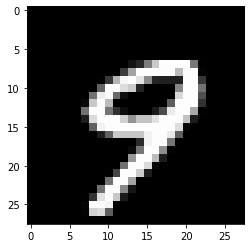

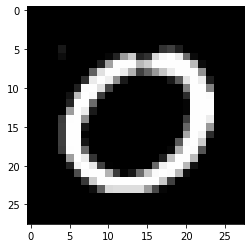

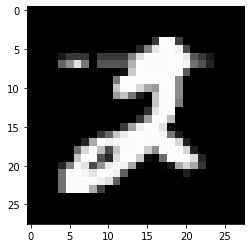

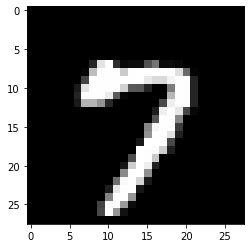

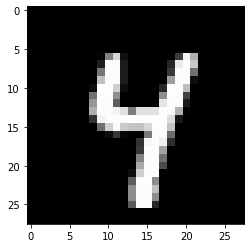

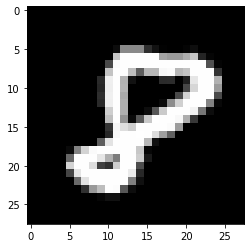

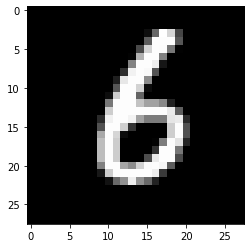

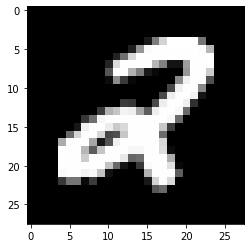

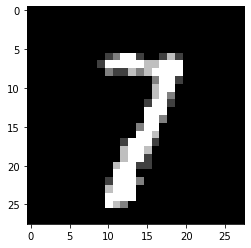

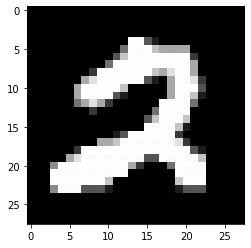

In [7]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)  
pd.set_option('max_rows', None)
data = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
Y = data['label'].to_numpy()
data = data.drop(columns=['label'])
X = data.to_numpy()
test = test.to_numpy()
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
X = X/255.0
test = test/255.0
indices = np.random.randint(low=0, high=42000, size=10)
for i in indices:
    plt.figure()
    plt.imshow(X[i,:,:,0], cmap='gray')
Y = to_categorical(Y, 10)

# Splitting the data into Training Set and Testing Set

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)


# Building a Sequential Model With 5 Convolution layer and 3 Max Pooling Layer


In [77]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32,(5,5), activation = 'relu', input_shape = (28,28,1)),
     tf.keras.layers.Conv2D(32,(5,5), activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
     tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.25),    
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(10 , activation = 'softmax')
])

# Model Summary

In [78]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 3, 64)         

# Model Compilation

In [79]:
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Creating Callbacks

In [80]:
from keras.callbacks import ModelCheckpoint   
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, verbose=1,
                              patience=3, min_lr=0.00001)

# Training The Model

In [85]:
history = model.fit(X_train,Y_train,epochs=100 , validation_data=(X_test,Y_test),callbacks=[reduce_lr],shuffle=True, batch_size=86)

Epoch 1/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0221 - accuracy: 0.9958 - val_loss: 0.0981 - val_accuracy: 0.9905
Epoch 2/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0195 - accuracy: 0.9960 - val_loss: 0.0892 - val_accuracy: 0.9890
Epoch 3/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9962 - val_loss: 0.1037 - val_accuracy: 0.9900
Epoch 4/100
464/464 [==============================] - 3s 6ms/step - loss: 0.0224 - accuracy: 0.9956 - val_loss: 0.0545 - val_accuracy: 0.9900
Epoch 5/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0171 - accuracy: 0.9961 - val_loss: 0.0788 - val_accuracy: 0.9886
Epoch 6/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0175 - accuracy: 0.9966 - val_loss: 0.1050 - val_accuracy: 0.9905
Epoch 7/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0176 - accuracy: 0.9966 - val_loss: 0.0603 - val_accuracy: 0.9919

Epoch 58/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0257 - accuracy: 0.9965 - val_loss: 0.2692 - val_accuracy: 0.9890
Epoch 59/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0329 - accuracy: 0.9961 - val_loss: 0.1372 - val_accuracy: 0.9881
Epoch 60/100
464/464 [==============================] - 3s 6ms/step - loss: 0.0272 - accuracy: 0.9960 - val_loss: 0.1741 - val_accuracy: 0.9895
Epoch 61/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0300 - accuracy: 0.9971 - val_loss: 0.1617 - val_accuracy: 0.9881
Epoch 62/100
464/464 [==============================] - 3s 6ms/step - loss: 0.0213 - accuracy: 0.9971 - val_loss: 0.1638 - val_accuracy: 0.9914
Epoch 63/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0245 - accuracy: 0.9969 - val_loss: 0.2043 - val_accuracy: 0.9886
Epoch 64/100
464/464 [==============================] - 2s 5ms/step - loss: 0.0313 - accuracy: 0.9965 - val_loss: 0.4401 - val_accuracy:

# Plotting Loss of the traning model

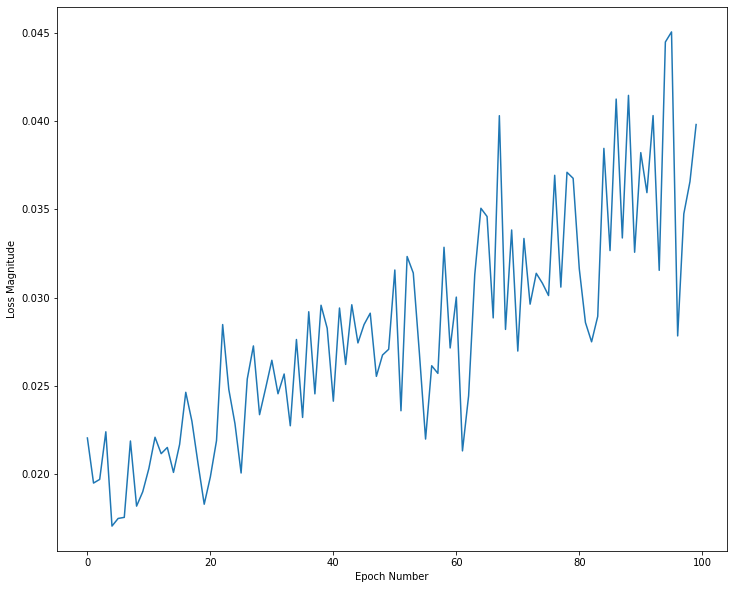

In [86]:

width = 12
height = 10
plt.figure(figsize=(width, height))
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

# Plotting Accuracy of the traning model

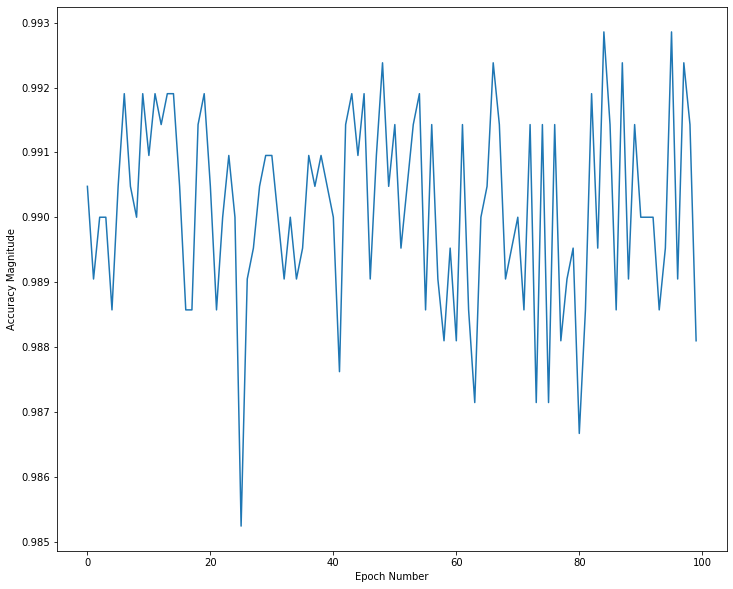

In [87]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy Magnitude")
plt.plot(history.history['val_accuracy'])
plt.show()

In [88]:
preds = model.predict(test)
preds = preds.argmax(axis=1)
imageid = np.arange(1,28001)
output = pd.DataFrame({"ImageId": imageid,"Label": preds})
output.to_csv('submissions12.csv', index=False)